In [169]:
%matplotlib inline

# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.utils as utils
import sklearn.metrics as metrics
import sklearn.cross_validation as cross_validation
import sklearn.cluster as cluster
import scipy as sp
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr

In [170]:
class Hotel():
    
    def __init__(self,name):
        self.name = name
        self.ex = 0
        self.vg = 0
        self.av = 0 
        self.po = 0
        self.te = 0 
        self.score = 0 

In [171]:
'''Import the file and then using the above class definition of hotel to add its ratings by looping
line by line through the "traverler_ratings.csv" file , Then create  a list of all the Hotel class objects'''
import csv                                   
import re
hotel_list = []
hotel_trscore = []
with open("traverler_ratings.csv") as file:
    global hotel_trscore
    global hotel_list
    hotel_list.append("")
    hotel_trscore.append("")
    readr = csv.reader(file)
    for line in readr:
        
        if (line[0] == hotel_list[-1]):
            h = hotel_trscore[-1]
            
            if(line[1] == 'Very good'):
                h.vg = int(re.sub('[^0-9]+', '', line[2]))

            if(line[1] == 'Average'):
                h.av = int(re.sub('[^0-9]+', '', line[2]))

            if(line[1] == 'Poor'):
                h.po = int(re.sub('[^0-9]+', '', line[2]))

            if(line[1] == 'Terrible'):
                h.te = int(re.sub('[^0-9]+', '', line[2]))
        else:
            
            hotel_list.append(line[0])
            ho = Hotel(line[0])
            hotel_trscore.append( ho ) 
            h = hotel_trscore[-1]
            
            if(line[1] == "Excellent"):
                h.ex = int(re.sub('[^0-9]+', '', line[2]))

'''Creating the AVG_SCORE and saving it as score attribute of this class Hotel'''
for ind, i in enumerate( hotel_trscore[2:]):
    i.score =  (((5*i.ex)+(4*i.vg) +(3*i.av)+(2*i.po) +(1*i.te)) / ((i.ex)+(i.vg)+(i.av)+(i.po)+(i.te)))

all_hotels = hotel_trscore[2:]   

''' Going throught the "attribute_ratings.csv" file and using a dictionary of dictionarie to save data of each hotel
'''

adf = pd.DataFrame(columns= ['hotel','Value','Sleep Quality', 'Service', 'Rooms','Location','Cleanliness'])
review = dict()
with open("attribute_ratings.csv") as file:
    r = csv.reader(file)
    for index , line in enumerate (r):
        if (index > 0):
            if line[1] in review.keys():
                review[line[1]]["hotel"] = line[0]
                review[line[1]][line[2]] = int(line[3])

            else:
                review[line[1]] = dict()
                review[line[1]]['hotel'] = line[0]
                review[line[1]]['Value'] = None
                review[line[1]]['Sleep Quality'] = None
                review[line[1]]['Service'] = None
                review[line[1]]['Rooms'] = None
                review[line[1]]['Location'] = None
                review[line[1]]['Cleanliness'] = None

                review[line[1]][line[2]] = int(line[3])
        else:
            pass

'''Creating a dataframe for each hotel and then concatinating them to creat the whole'''
frames = []
for i in review:
    p =(pd.DataFrame(review[i],index = [i]))
    frames.append(p)

newdf = pd.concat(frames)
newdf.drop('Check in / front desk',1,inplace=True)
newdf.drop('Business service (e.g., internet access)',1,inplace=True)



def avg_val(lst,c,hotel,index):
    global index_to_remove
    '''Using this function to create the average values for each attribute from all the review for that hotel'''
    j = 0 
    for i in lst:
        if i == None:pass
        else:
            j = j + i 
            c = c + 1
    if c == 0 :
        '''The hotel and its index which for which none of the review contain a certain attribute'''
        print(index,hotel)
        index_to_remove = index
        return None
    else:
        return (j/c)

frames2 = []

for i,h in enumerate(all_hotels):                               
    l = newdf[newdf.hotel == h.name]
    cl = avg_val(list(l.ix[:,0]),0,h.name,i)
    lo = avg_val(list(l.ix[:,1]),0,h.name,i)
    ro = avg_val(list(l.ix[:,2]),0,h.name,i)
    sr = avg_val(list(l.ix[:,3]),0,h.name,i)
    sq = avg_val(list(l.ix[:,4]),0,h.name,i)
    va = avg_val(list(l.ix[:,5]),0,h.name,i)
    
    df = pd.DataFrame( { 'hotel':[h.name],'Value':va,'Sleep Quality':sq ,'Service':sr, 
                       'Rooms':ro,'Location':lo,'Cleanliness':cl, 'score':[h.score] } )
    frames2.append(df)

'''The Element Boston Seaport needs to be removed from the list'''
del frames2[index_to_remove]
X = pd.concat(frames2)

62 Element Boston Seaport


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 0
Data columns (total 8 columns):
Cleanliness      81 non-null float64
Location         81 non-null float64
Rooms            81 non-null float64
Service          81 non-null float64
SleepQuality     81 non-null float64
Value            81 non-null float64
Hotel_Name       81 non-null object
Average_Score    81 non-null float64
dtypes: float64(7), object(1)
memory usage: 5.7+ KB


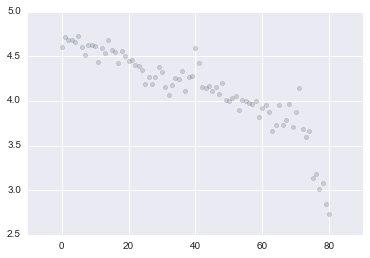

In [172]:
attribute = [ 'Cleanliness','Location','Rooms','Service',
             'SleepQuality','Value','Hotel_Name','Average_Score']
X.columns = attribute
X.info()
G = X[ [ 'Cleanliness','Location','Rooms','Service',
             'SleepQuality','Value','Hotel_Name','Average_Score']]
X_h = G.copy()
del X_h['Hotel_Name']
y_h = X.Average_Score
del X_h['Average_Score']
plt.scatter(range(len(y_h)), y_h, c="slategray", alpha=0.3, linewidths=0.2)

In [173]:
X_h , y_h = utils.shuffle(X_h,y_h , random_state = 1)
X_train ,X_test ,y_train, y_test = cross_validation.train_test_split(X_h,y_h, 
                                                                     test_size = 0.4, 
                                                                     random_state = 0 )
print("Training Data shape ", (X_train.shape),y_train.shape)
print("Test Data Shape",(X_test.shape),y_test.shape)

Training Data shape  (48, 6) (48,)
Test Data Shape (33, 6) (33,)


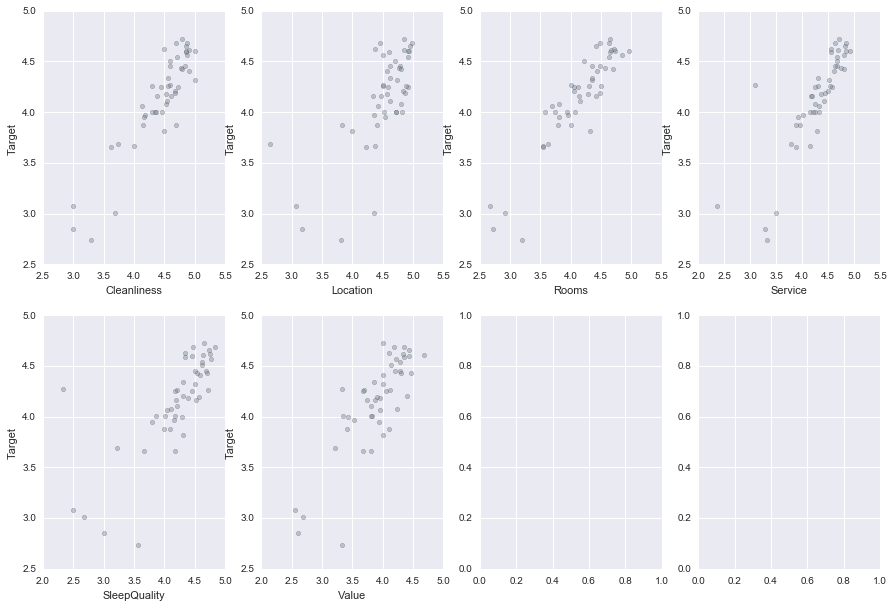

In [174]:
fig, axes = plt.subplots(2,4,figsize=(15,10))

for i in range(6):
    plt_i = i // 4
    plt_j = i % 4
    subX_train = X_train[X_train.columns[i]]
    # plt.subplot(2, 4, 1 + i)
    axes[plt_i][plt_j].scatter(subX_train, y_train, c="slategray", alpha=0.4, linewidths=0.3)
    #plt.scatter(subX_test, y_test)
    axes[plt_i][plt_j].set_xlabel(X_train.columns[i])
    axes[plt_i][plt_j].set_ylabel('Target')

In [175]:
model =  sm.OLS(y_train , X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Average_Score   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4930.
Date:                Fri, 18 Nov 2016   Prob (F-statistic):           3.85e-58
Time:                        18:17:47   Log-Likelihood:                 20.773
No. Observations:                  48   AIC:                            -29.55
Df Residuals:                      42   BIC:                            -18.32
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Cleanliness      0.3030      0.142      2.139   

"Location" , "Servive" ,"SleepQuality","Value" all contain 0 in their confidence interwals and hence cannot have any good predictive value.

"Rooms" and "Cleanliness" have a high coeffecient and are most important factors for a good rating for a hotel.

The R-square value is also very high so it is a good model.

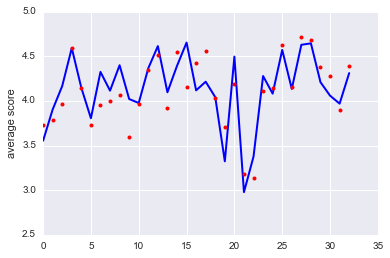

In [176]:
y_ols = np.dot( X_test ,(result.params) )        # Plotting over the test data only , looks lika good fit
plt.plot(y_ols,'b-',lw=2)
plt.plot(range(len(y_test)), y_test,'ro',markersize=4)
plt.ylabel('average score')

'This is how thw plot look over the whole data'

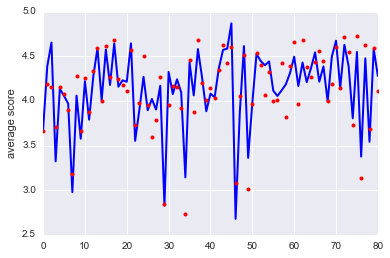

In [177]:
y_ols_all = np.dot( X_h[train_cols] ,(result.params) )
plt.plot(y_ols_all,'b-',lw=2)
plt.plot(range(len(y_h)), y_h,'ro',markersize=4)
plt.ylabel('average score')
'''This is how thw plot look over the whole data'''

# "Excellency" Prediction 

In [178]:
all_hotels[index_to_remove].name               # This hotel need to be excluded from the list
del all_hotels[index_to_remove]

excellency = []
for ind, i in enumerate( all_hotels):
    i.total  = ((i.ex)+(i.vg)+(i.av)+(i.po)+(i.te))
    excellency.append(1 if (i.ex > (0.6*i.total)) else 0)

S = X.copy()
S['Excellency'] = excellency

In [179]:
train_cols = S.columns[:6]

In [180]:
S =  utils.shuffle(S, random_state = 1)
S_train, S_test, yrg_train, yrg_test = cross_validation.train_test_split(
        S[train_cols], S['Excellency'],
        test_size=0.4, random_state=1)

logit = sm.Logit(yrg_train, S_train)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.497861
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Excellency   No. Observations:                   48
Model:                          Logit   Df Residuals:                       42
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 Nov 2016   Pseudo R-squ.:                  0.1984
Time:                        18:17:48   Log-Likelihood:                -23.897
converged:                       True   LL-Null:                       -29.812
                                        LLR p-value:                   0.03720
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Cleanliness     -5.0024      2.351     -2.128      0.033        -9.610    -0.395
Location        -0.8048

Here " Rooms " and " Sleep Quality " seem to matter a lot as they do not contain zero in their confidence interval 

Overall "Rooms" seem to be the most impost factor of all, A hotel with good rooms is what attracts better ratings and reviews on  an average. This is the conclusion one can draw from the data and the analysis.

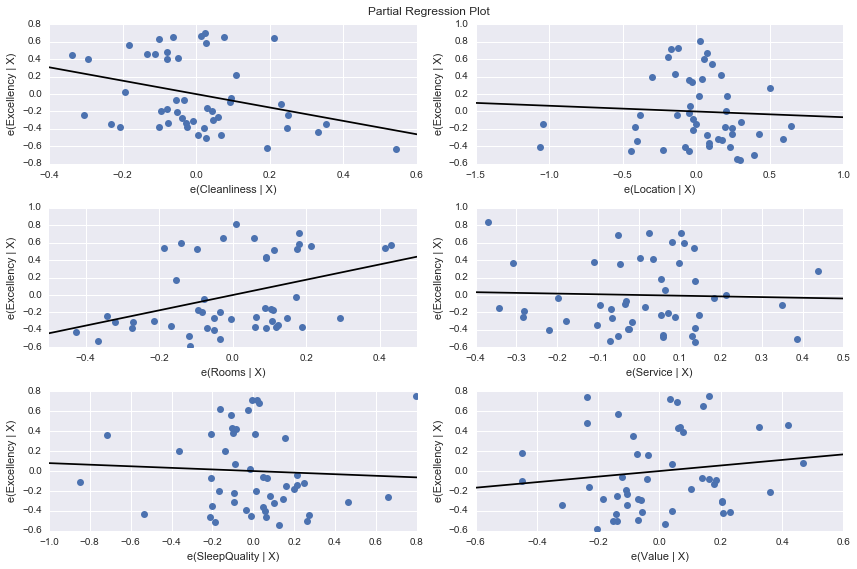

In [181]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(result, fig=fig)

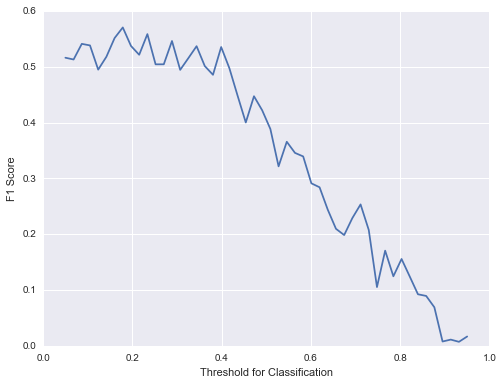

In [182]:
def evaluate(y_train, X_train, y_test, X_test, threshold):
    logit = sm.Logit(y_train, X_train)
    result = logit.fit(disp=False) 

    truePositives = falsePositives = trueNegatives = falseNegatives = 0
    for x, y, in zip(X_test.values, y_test):
        yhat = result.predict(x)
        if y==1 and yhat > threshold:
            truePositives += 1
        elif y==1:
            falseNegatives += 1
        elif yhat > threshold:
            falsePositives += 1
        else:
            trueNegatives +=1
            
    if (truePositives + falsePositives) == 0:
        precision = 0
    else:
        precision = truePositives / (truePositives + falsePositives)
        
    if (truePositives + falseNegatives) == 0:
        recall = 0
    else:
        recall = truePositives / (truePositives + falseNegatives)
    
    return precision, recall



def evalThresh(df, thresh):
    PR = []
    for i in range(20):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                df[train_cols], df['Excellency'],
                test_size=0.4)
        PR.append(evaluate(y_train, X_train, y_test, X_test, thresh))
    avgPrec = np.mean([f[0] for f in PR])
    avgRec = np.mean([f[1] for f in PR])
    return 2 * (avgPrec * avgRec) / (avgPrec + avgRec), avgPrec, avgRec

tvals = np.linspace(0.05, 0.95, 50)
f1vals = [evalThresh(S, tval)[0] for tval in tvals]

fig = plt.figure(figsize=(8, 6)) 
plt.plot(tvals,f1vals)
plt.ylabel('F1 Score')
_=plt.xlabel('Threshold for Classification')


 0.16 approximately seems like a good classification threshold for classification.

In [183]:
F1, Prec, Rec = evalThresh(S, 0.16)
print('Best Precision: {:0.2f}, Best Recall: {:0.2f} , F1-Score: {:0.2f}'.format(Prec, Rec, F1) )


Best Precision: 0.38, Best Recall: 0.85 , F1-Score: 0.53


In [184]:
beta = np.dot(S_test,result.params)
import math
probabs= []
for i in beta:
    g_theta = 1 /(1 + ( math.exp((-1)*i)))
    ex = 1 if (g_theta > 0.16) else 0    # Classification based on threshold
    probabs.append(ex)
print("Predicted Result :", probabs,"\n","Actual Test Data:", list(yrg_test),"\n")
print("F1 score (using sci-kit learn) at 0.16 threshold by comparing the ")
print("'predicted result' and the 'actual test data' :",metrics.f1_score(yrg_test,probabs, average= 'binary'))
# Using a different measure F-1 score from the scikit-learn library

Predicted Result : [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1] 
 Actual Test Data: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0] 

F1 score (using sci-kit learn) at 0.16 threshold by comparing the 
'predicted result' and the 'actual test data' : 0.571428571429


In [185]:
betaa = np.dot(S[train_cols],result.params)
'''Performing the above process on the whole data and creating a Dataframe'''
import math
proba= []
for i in betaa:
    g_theta = 1 /(1 + ( math.exp((-1)*i)))
    ex = 1 if (g_theta > 0.16) else 0    # Classification based on threshold
    proba.append(ex)
    
def excell(lst):
    rlst = []
    for i in lst:
        if i == 1:
            rlst.append("Excellent !!! :)")
        else:
            rlst.append("Not Excellent  :(")
    return rlst

D = pd.DataFrame({'Hotel':S.Hotel_Name,'Actual':excell(list(S.Excellency)),'Predicted':excell(proba)})

correctD = D.loc[D['Actual'] == D['Predicted']]

print(" Number of columns accurately predicted is ",correctD.shape[0] ,"out of ",D.shape[0],"with an accuracy of",
      int(correctD.shape[0]) /int(D.shape[0]))

correctD

 Number of columns accurately predicted is  47 out of  81 with an accuracy of 0.5802469135802469


,Actual,Hotel,Predicted
0,Not Excellent :(,Boston Hotel Buckminster,Not Excellent :(
0,Not Excellent :(,Harborside Inn,Not Excellent :(
0,Not Excellent :(,Kimpton Onyx Hotel,Not Excellent :(
0,Not Excellent :(,Wyndham Boston Beacon Hill,Not Excellent :(
0,Excellent !!! :),The Inn At St Botolph,Excellent !!! :)
0,Excellent !!! :),XV Beacon,Excellent !!! :)
0,Not Excellent :(,"The Liberty, A Luxury Collection Hotel",Not Excellent :(
0,Excellent !!! :),Seaport Boston Hotel,Excellent !!! :)
0,Not Excellent :(,Boston Marriott Long Wharf,Not Excellent :(
0,Not Excellent :(,Sheraton Boston Hotel,Not Excellent :(
